In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../../data/chunk_authors.csv')
df.head()

,chunk_id,left_size,right_size,authors_left,authors_right
0,776661,1,1,"{'tiago@3scale.net': {'modified': 1, 'deleted'...","{'geoffd123@hotmail.com': {'modified': 1, 'del..."
1,776662,6,12,"{'tiago@3scale.net': {'modified': 1, 'deleted'...",{'geoffd@professionalhosts.com': {'modified': ...
2,776697,60,0,"{'njbartlett@gmail.com': {'modified': 57, 'del...",{}
3,776700,17,31,"{'njbartlett@gmail.com': {'modified': 17, 'del...","{'njbartlett@gmail.com': {'modified': 31, 'del..."
4,776710,2,2,"{'chris@wensel.net': {'modified': 2, 'deleted'...","{'chris@wensel.net': {'modified': 2, 'deleted'..."


In [3]:
chunks = pd.read_csv('../../data/LABELLED_DATASET.csv')
chunk_ids = list(chunks['chunk_id'])
chunks.head()

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
0,776661,Version 1,94,98,96,If statement,https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/main/java/ne...,HttpSenderImpl.java,c3b5f5d43f5699e2e4d698bd32a74dad9ac1d477,78eceb43ad7a9dd89e7c2f36f82b0e36061e40ff,85d75a23e94054bbb8c219f21036872149150a90,5277a08c45e15394d28fa2c059746fadd4601585
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/net/threesca...,Api2Impl.java,332b6ed4e324199565e235cd915368f9bc1b43d2,4650578dee712b2b08f2ead2bf6a531f82b1e0e9,d623f491daa2f14f06f53338265d28a489138a6b,1d2ec0a2016edab9736e163e09d7a994af00ccbf
2,776697,Version 2,70,132,131,"Attribute, Method invocation",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,bndtools/bndtools/bndtools.core/src/bndtools/P...,Plugin.java,41b35cd3c4fa423382bac2a22d0da09da6008730,4bed1de20aa8580200ed6f1b4edd585c2972a0e2,7486a0c479d1d221f3dc225bf79a2cd7383e9543,04e207ec8150eaca40ccc3fb0ecda0f4312aa2c8
3,776700,Version 1,304,354,322,"Comment, For statement, If statement, Method i...",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,bndtools/bndtools/bndtools.core/src/bndtools/v...,ImportsExportsView.java,8f113c6f5d090ff539f3c342591a575b976fd23d,350da937afff3f6e47234ba0831c1976adb7c472,bd65c61548fb0eafd7101c9f480771e3faf0a6ab,3c8c593532fa0ac85312ac273ca5c8865a9430e6
4,776710,Version 2,125,131,128,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,URISanitizer.java,567eec5076644db52aef9a4ef3ac06bb1d3b1878,3bc51bd2779e15e7aced4679b7e9ce7d1306f2e4,3155ab278e684b614fc68c136b3591638c32b07d,f00081a06e3423ff926109532ffa047851c47af0


In [4]:
selected_chunks = df[df['chunk_id'].isin(chunk_ids)]
selected_chunks.head()

,chunk_id,left_size,right_size,authors_left,authors_right
0,776661,1,1,"{'tiago@3scale.net': {'modified': 1, 'deleted'...","{'geoffd123@hotmail.com': {'modified': 1, 'del..."
1,776662,6,12,"{'tiago@3scale.net': {'modified': 1, 'deleted'...",{'geoffd@professionalhosts.com': {'modified': ...
2,776697,60,0,"{'njbartlett@gmail.com': {'modified': 57, 'del...",{}
3,776700,17,31,"{'njbartlett@gmail.com': {'modified': 17, 'del...","{'njbartlett@gmail.com': {'modified': 31, 'del..."
4,776710,2,2,"{'chris@wensel.net': {'modified': 2, 'deleted'...","{'chris@wensel.net': {'modified': 2, 'deleted'..."


In [5]:
selected_chunks = chunks.merge(selected_chunks)
total_projects = len(pd.unique(selected_chunks['project']))

In [6]:
print(f"Total of chunks processed: {len(df)} from {total_projects} projects.")

Total of chunks processed: 163245 from 2568 projects.


In [7]:
selected = selected_chunks[(selected_chunks['authors_left'] != '{}') & (selected_chunks['authors_right'] != '{}')]
total_projects = len(pd.unique(selected['project']))
print(f"Total of chunks with at least one author: {len(selected)} from {total_projects} projects.")

Total of chunks with at least one author: 129438 from 2457 projects.


In [8]:
data = []
columns = list(selected.columns)
columns.extend(["total_authors_left", "total_authors_right"])
for index, row in selected.iterrows():
    current_row = []
    current_row.extend(row)
    authors_left = eval(row['authors_left'])
    number_authors_left = len(authors_left)
    authors_right = eval(row['authors_right'])
    number_authors_right = len(authors_right)
    current_row.extend([number_authors_left, number_authors_right])
    data.append(current_row)
    
new_df = pd.DataFrame(data, columns=columns)
new_df.head()

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,...,sha,leftsha,rightsha,basesha,left_size,right_size,authors_left,authors_right,total_authors_left,total_authors_right
0,776661,Version 1,94,98,96,If statement,https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,...,c3b5f5d43f5699e2e4d698bd32a74dad9ac1d477,78eceb43ad7a9dd89e7c2f36f82b0e36061e40ff,85d75a23e94054bbb8c219f21036872149150a90,5277a08c45e15394d28fa2c059746fadd4601585,1,1,"{'tiago@3scale.net': {'modified': 1, 'deleted'...","{'geoffd123@hotmail.com': {'modified': 1, 'del...",1,1
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,...,332b6ed4e324199565e235cd915368f9bc1b43d2,4650578dee712b2b08f2ead2bf6a531f82b1e0e9,d623f491daa2f14f06f53338265d28a489138a6b,1d2ec0a2016edab9736e163e09d7a994af00ccbf,6,12,"{'tiago@3scale.net': {'modified': 1, 'deleted'...",{'geoffd@professionalhosts.com': {'modified': ...,2,1
2,776700,Version 1,304,354,322,"Comment, For statement, If statement, Method i...",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,...,8f113c6f5d090ff539f3c342591a575b976fd23d,350da937afff3f6e47234ba0831c1976adb7c472,bd65c61548fb0eafd7101c9f480771e3faf0a6ab,3c8c593532fa0ac85312ac273ca5c8865a9430e6,17,31,"{'njbartlett@gmail.com': {'modified': 17, 'del...","{'njbartlett@gmail.com': {'modified': 31, 'del...",1,1
3,776710,Version 2,125,131,128,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,567eec5076644db52aef9a4ef3ac06bb1d3b1878,3bc51bd2779e15e7aced4679b7e9ce7d1306f2e4,3155ab278e684b614fc68c136b3591638c32b07d,f00081a06e3423ff926109532ffa047851c47af0,2,2,"{'chris@wensel.net': {'modified': 2, 'deleted'...","{'chris@wensel.net': {'modified': 2, 'deleted'...",1,1
4,776713,ConcatenationV1V2,183,203,196,"Method invocation, Method signature, Variable",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,567eec5076644db52aef9a4ef3ac06bb1d3b1878,3bc51bd2779e15e7aced4679b7e9ce7d1306f2e4,3155ab278e684b614fc68c136b3591638c32b07d,f00081a06e3423ff926109532ffa047851c47af0,12,6,"{'chris@wensel.net': {'modified': 12, 'deleted...",{'efeshundertelf@googlemail.com': {'modified':...,1,1


In [9]:
print(new_df["total_authors_left"].max())
print(new_df["total_authors_right"].max())

22
36


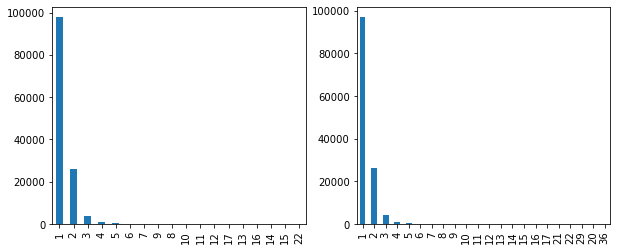

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
new_df['total_authors_left'].value_counts().plot(ax=axes[0], kind='bar')
new_df['total_authors_right'].value_counts().plot(ax=axes[1], kind='bar')
plt.show()

In [11]:
def get_biggest_contributors(authors):
    biggest_contributors = []
    biggest_contribution = 0
    for author in authors:
        total_contribution = authors[author]['modified']
        total_contribution += authors[author]['deleted']
        
        if total_contribution > biggest_contribution:
            biggest_contributors = [author]
            biggest_contribution = total_contribution
        elif total_contribution == biggest_contribution:
            biggest_contributors.append(author)
    return biggest_contributors, biggest_contribution

# chunk self-conflicts definition:
#    atleast1: at least one author that contributed to left side of the chunk also contributed to the right side
#    biggest: the biggest contributors to the left side is also among the biggest contributors to the right side
#    allequal: all authors of the left side are also all the authors of the right side
def get_total_self_conflicts(chunks):
    self_conflicts_atleast1 = 0
    self_conflicts_biggest = 0
    self_conflicts_allequal = 0
    
    for index, row in chunks.iterrows():
        authors_left = eval(row['authors_left'])
        authors_right = eval(row['authors_right'])

        for author in authors_left:
            if author in authors_right:
                self_conflicts_atleast1+=1
                break  
        
        biggest_contributors_left, biggest_contribution_left = get_biggest_contributors(authors_left)
        biggest_contributors_right, biggest_contribution_right = get_biggest_contributors(authors_right)
    
        for contributor in biggest_contributors_left:
            if contributor in biggest_contributors_right:
                self_conflicts_biggest+=1
                break
        
        left = set()
        right = set()
        for author in authors_left:
            left.add(author)
        for author in authors_right:
            right.add(author)
        if left == right:
            self_conflicts_allequal+=1        
    return self_conflicts_atleast1, self_conflicts_biggest, self_conflicts_allequal      

In [12]:
atleast1, biggest, allequal = get_total_self_conflicts(selected)
atleast1_perc = (atleast1/len(selected)) * 100
biggest_perc = (biggest/len(selected)) * 100
allequal_perc = (allequal/len(selected)) * 100
print("Self-conflicts: ")
print(f"At least one author from the left side is present on the right side: {atleast1}/{len(selected)}: ({atleast1_perc:.2f}%)")
print(f"The biggest contributors to the left side is also among the biggest contributors to the right side: {biggest}/{len(selected)}: ({biggest_perc:.2f}%)")
print(f"All authors of the left side are also all the authors of the right side: {allequal}/{len(selected)}: ({allequal_perc:.2f}%)")

Self-conflicts: 
At least one author from the left side is present on the right side: 80080/129438: (61.87%)
The biggest contributors to the left side is also among the biggest contributors to the right side: 62474/129438: (48.27%)
All authors of the left side are also all the authors of the right side: 47299/129438: (36.54%)


## Considering only projects with > 1000 chunks

In [13]:
chunks = pd.read_csv('../../data/SELECTED_LABELLED_DATASET.csv')
chunk_ids = list(chunks['chunk_id'])
chunks.head()

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
0,777206,ConcatenationV2V1,427,436,434,"Attribute, Comment, Method invocation",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,2d88e89330552363f1d2af979ac3ebf232a91fb3,9d7836b5669d0e46f064fc9e6f38cf083af0596d,1f156abfcadb3d3913098ee78c1bd0d94fb71e9b,64ee8602e09ea183670543eef0641cbbbaf73aa9
1,777207,Version 1,2826,2871,2827,"Comment, Method declaration",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,2d5c6e5d12d784bd7538eb5aab421691ce4c688d,2cc6902f6ee2d91c8629a6e2c9a52e4e097bf458,b514b5f6701fda49873f080da5be47a16a960394,af5bfb3e0e56ecd8413c853d266babe49a95e16e
2,777216,Combination,2458,2465,2463,"Comment, Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,f32b758df664833130d5d75006a09df0fae43d71,a4aadbce8fcf23feae6eae07232615200796f017,51e8088a8bb66a2724ca26c8aa84b8f4e7db1a4c,1faa5059f12dc3df89ac25550565b3cfda91a6a2
3,777218,Combination,2476,2482,2479,"Comment, Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,f32b758df664833130d5d75006a09df0fae43d71,a4aadbce8fcf23feae6eae07232615200796f017,51e8088a8bb66a2724ca26c8aa84b8f4e7db1a4c,1faa5059f12dc3df89ac25550565b3cfda91a6a2
4,777221,Version 1,750,753,751,"Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/libanki/Me...,Media.java,59973c74b19c37712c469bdafbdb10cc665d7b93,d55c2d96484a99666182be460adde72090045317,17ffea93b3c39863f959d92f78c3df21818b74f8,7921c523e33cae37a7331396892feaf0830c4302


In [14]:
selected_chunks = df[df['chunk_id'].isin(chunk_ids)]
selected_chunks.head()

,chunk_id,left_size,right_size,authors_left,authors_right
202,777206,6,1,"{'norbertnagold@gmail.com': {'modified': 1, 'd...","{'houssam.salem.au@gmail.com': {'modified': 1,..."
208,777207,0,43,{},"{'flerda@google.com': {'modified': 15, 'delete..."
222,777216,4,1,"{'ntsp.gm@gmail.com': {'modified': 3, 'deleted...","{'inigo.aldana@gmail.com': {'modified': 1, 'de..."
223,777218,2,2,"{'ntsp.gm@gmail.com': {'modified': 1, 'deleted...","{'norbert.nagold@gmail.com': {'modified': 1, '..."
226,777221,0,1,{},"{'norbert.nagold@gmail.com': {'modified': 1, '..."


In [15]:
selected_chunks = chunks.merge(selected_chunks)
total_projects = len(pd.unique(selected_chunks['project']))

In [16]:
print(f"Total of chunks processed: {len(selected_chunks)} from {total_projects} projects.")

Total of chunks processed: 64749 from 28 projects.


In [17]:
selected_restricted = selected_chunks[(selected_chunks['authors_left'] != '{}') & (selected_chunks['authors_right'] != '{}')]
total_projects = len(pd.unique(selected_restricted['project']))
print(f"Total of chunks with at least one author: {len(selected_restricted)} from {total_projects} projects.")

Total of chunks with at least one author: 53237 from 28 projects.


In [18]:
data = []
columns = list(selected.columns)
columns.extend(["total_authors_left", "total_authors_right"])
for index, row in selected.iterrows():
    current_row = []
    current_row.extend(row)
    authors_left = eval(row['authors_left'])
    number_authors_left = len(authors_left)
    authors_right = eval(row['authors_right'])
    number_authors_right = len(authors_right)
    current_row.extend([number_authors_left, number_authors_right])
    data.append(current_row)
    
new_df = pd.DataFrame(data, columns=columns)
new_df.head()

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,...,sha,leftsha,rightsha,basesha,left_size,right_size,authors_left,authors_right,total_authors_left,total_authors_right
0,776661,Version 1,94,98,96,If statement,https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,...,c3b5f5d43f5699e2e4d698bd32a74dad9ac1d477,78eceb43ad7a9dd89e7c2f36f82b0e36061e40ff,85d75a23e94054bbb8c219f21036872149150a90,5277a08c45e15394d28fa2c059746fadd4601585,1,1,"{'tiago@3scale.net': {'modified': 1, 'deleted'...","{'geoffd123@hotmail.com': {'modified': 1, 'del...",1,1
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,...,332b6ed4e324199565e235cd915368f9bc1b43d2,4650578dee712b2b08f2ead2bf6a531f82b1e0e9,d623f491daa2f14f06f53338265d28a489138a6b,1d2ec0a2016edab9736e163e09d7a994af00ccbf,6,12,"{'tiago@3scale.net': {'modified': 1, 'deleted'...",{'geoffd@professionalhosts.com': {'modified': ...,2,1
2,776700,Version 1,304,354,322,"Comment, For statement, If statement, Method i...",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,...,8f113c6f5d090ff539f3c342591a575b976fd23d,350da937afff3f6e47234ba0831c1976adb7c472,bd65c61548fb0eafd7101c9f480771e3faf0a6ab,3c8c593532fa0ac85312ac273ca5c8865a9430e6,17,31,"{'njbartlett@gmail.com': {'modified': 17, 'del...","{'njbartlett@gmail.com': {'modified': 31, 'del...",1,1
3,776710,Version 2,125,131,128,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,567eec5076644db52aef9a4ef3ac06bb1d3b1878,3bc51bd2779e15e7aced4679b7e9ce7d1306f2e4,3155ab278e684b614fc68c136b3591638c32b07d,f00081a06e3423ff926109532ffa047851c47af0,2,2,"{'chris@wensel.net': {'modified': 2, 'deleted'...","{'chris@wensel.net': {'modified': 2, 'deleted'...",1,1
4,776713,ConcatenationV1V2,183,203,196,"Method invocation, Method signature, Variable",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,567eec5076644db52aef9a4ef3ac06bb1d3b1878,3bc51bd2779e15e7aced4679b7e9ce7d1306f2e4,3155ab278e684b614fc68c136b3591638c32b07d,f00081a06e3423ff926109532ffa047851c47af0,12,6,"{'chris@wensel.net': {'modified': 12, 'deleted...",{'efeshundertelf@googlemail.com': {'modified':...,1,1


In [19]:
print(new_df["total_authors_left"].max())
print(new_df["total_authors_right"].max())

22
36


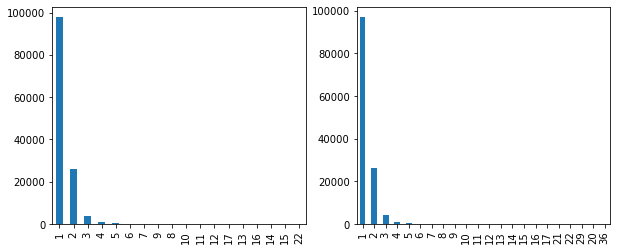

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
new_df['total_authors_left'].value_counts().plot(ax=axes[0], kind='bar')
new_df['total_authors_right'].value_counts().plot(ax=axes[1], kind='bar')
plt.show()

In [21]:
atleast1, biggest, allequal = get_total_self_conflicts(selected_restricted)
atleast1_perc = (atleast1/len(selected_restricted)) * 100
biggest_perc = (biggest/len(selected_restricted)) * 100
allequal_perc = (allequal/len(selected_restricted)) * 100
print("Self-conflicts: ")
print(f"At least one author from the left side is present on the right side: {atleast1}/{len(selected_restricted)}: ({atleast1_perc:.2f}%)")
print(f"The biggest contributors to the left side is also among the biggest contributors to the right side: {biggest}/{len(selected_restricted)}: ({biggest_perc:.2f}%)")
print(f"All authors of the left side are also all the authors of the right side: {allequal}/{len(selected_restricted)}: ({allequal_perc:.2f}%)")

Self-conflicts: 
At least one author from the left side is present on the right side: 34969/53237: (65.69%)
The biggest contributors to the left side is also among the biggest contributors to the right side: 28115/53237: (52.81%)
All authors of the left side are also all the authors of the right side: 22927/53237: (43.07%)
